# Determination of a prospective tariff for a telecom company

*You are an analyst at a federal mobile operator. Clients are offered two tariff plans: "Smart" and "Ultra". To adjust the advertising budget, the commercial department wants to understand which tariff brings in more money.*

## To do:
1. Data preparation
2. Data analysis
3. Hypothesis testing
    - The average revenue of users of the "Ultra" and "Smart" tariffs differ
    - The average revenue of users from Moscow differs from the revenue of users from other regions.
4. Conclusions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
calls = pd.read_csv('Downloads\calls.csv')
messages = pd.read_csv('Downloads\messages.csv')
internet = pd.read_csv('Downloads\internet.csv')
tariffs = pd.read_csv(r'Downloads\tariffs.csv')
users= pd.read_csv(r'Downloads\users.csv')

In [3]:
#calls
display(calls.head())
display(calls.info())
calls.isnull().sum()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In `calls`:
- 4 columns
- 202607 rows
- no Nans, 
- incorrect type of date

In [4]:
#messages
display(messages.head())
display(messages.info())
messages.isnull().sum()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

id              0
message_date    0
user_id         0
dtype: int64

In `messages`:
- 3 columns
- 123036 rows
- no NaNs
- incorrect type of date

In [5]:
# internet
display(internet.head())
display(internet.info())
internet.isnull().sum()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In `internet`:
- 5 columns
- 149396 rows
- no NaNs
- incorrect type of date

In [6]:
display(tariffs.head())
display(tariffs.info())
tariffs.isnull().sum()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [7]:
display(users.head())
display(users.info())
users.isnull().sum()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In `users`:
- 8 columns
- 500 rows
- NaNs in churn_date
- incorrect type of date

## Data preparation

#### `Calls` preparation

In [8]:
# let's round up the values? because operator always rounds seconds to minutes
calls['duration'] = calls['duration'].apply(np.ceil)
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


In [9]:
# convert date for right format and extract month from the date
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.month

In [10]:
# Let's look at the total duration of each customer's calls per month and how many calls he made per month.
calls_final=calls.groupby(['user_id','month'])['duration'].agg(['count','sum']).reset_index()\
        .rename(columns={'count':'count_calls_month','sum':'duration_calls_month'})

#### `Messages` preparation

In [11]:
#messages
# concert date in right type and extract month
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month

In [12]:
# intresting how many messages each client send per month
messages_final=messages.groupby(['user_id','month'])['id'].agg('count').reset_index()\
        .rename(columns={'id':'count_messages_month'})

In [13]:
messages_final.head()

,user_id,month,count_messages_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


#### `Internet` preparetion

In [14]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [15]:
# round up the values because operator always rounds megabytes up 

internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,1053.0,2018-09-07,1000
2,2,1000_2,1198.0,2018-06-25,1000
3,3,1000_3,551.0,2018-08-22,1000
4,4,1000_4,303.0,2018-09-24,1000


In [16]:
# convert date in right type and extract month
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month

In [17]:
internet_final=internet.groupby(['user_id','month'])['mb_used'].agg('sum').reset_index()\
        .rename(columns={'mb_used':'sum_mb_month'})
internet_final.head()

,user_id,month,sum_mb_month
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0


#### `Users` preparation

In [18]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [19]:
# fill NaNs on last date in year, we know that NaNs mean that client is still active user
users['churn_date'] = users['churn_date'].fillna('2018-12-31')

In [20]:
users.isnull().sum()

user_id       0
age           0
churn_date    0
city          0
first_name    0
last_name     0
reg_date      0
tariff        0
dtype: int64

In [21]:
# convert date in right format and ex
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_month'] = users['churn_date'].dt.month
users['reg_month'] = users['reg_date'].dt.month

In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   age          500 non-null    int64         
 2   churn_date   500 non-null    datetime64[ns]
 3   city         500 non-null    object        
 4   first_name   500 non-null    object        
 5   last_name    500 non-null    object        
 6   reg_date     500 non-null    datetime64[ns]
 7   tariff       500 non-null    object        
 8   churn_month  500 non-null    int64         
 9   reg_month    500 non-null    int64         
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 39.2+ KB


In [23]:
# calculate how many months the client is a subscriber
users['users_term'] = users['churn_month'] - users['reg_month'] +1

In [24]:
#drop uniportant features
final_users = users.drop(['churn_date','first_name','last_name','churn_month','reg_month'], axis=1)

In [25]:
final_users

,user_id,age,city,reg_date,tariff,users_term
0,1000,52,Краснодар,2018-05-25,ultra,8
1,1001,41,Москва,2018-11-01,smart,2
2,1002,59,Стерлитамак,2018-06-17,smart,7
3,1003,23,Москва,2018-08-17,ultra,5
4,1004,68,Новокузнецк,2018-05-14,ultra,8
...,...,...,...,...,...,...
495,1495,65,Иркутск,2018-08-28,ultra,5
496,1496,36,Вологда,2018-01-27,smart,12
497,1497,32,Челябинск,2018-10-09,smart,3
498,1498,68,Владикавказ,2018-07-19,smart,4


#### `Tariffs` preparation

In [26]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


This data is ok:)

In [27]:
calls_final.head(2)
calls_final.shape

(3174, 4)

In [28]:
messages_final.head(2)
messages_final.shape

(2717, 3)

In [29]:
internet_final.head(2)
internet_final.shape

(3203, 3)

#### Merge it!

In [30]:
final = final_users.merge(calls_final, on='user_id', how='outer')\
.merge(messages_final,on=['user_id','month'],how='outer')\
.merge(internet_final,on=['user_id','month'], how='outer')

In [31]:
final[['age', 'city','reg_date','tariff','users_term']] = \
final.groupby('user_id')[['age', 'city','reg_date','tariff','users_term']].ffill()

In [32]:
final.query('user_id==1489')

,user_id,age,city,reg_date,tariff,users_term,month,count_calls_month,duration_calls_month,count_messages_month,sum_mb_month
3121,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,NaN,NaN,NaN,NaN,NaN
3216,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,8.0,NaN,NaN,17.0,11066.0
3217,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,9.0,NaN,NaN,32.0,17232.0
3218,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,10.0,NaN,NaN,21.0,19588.0
3219,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,11.0,NaN,NaN,20.0,17516.0
3220,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,12.0,NaN,NaN,35.0,17341.0


In [33]:
# NaNs mean that the client did not use the service - replace it with 0 
final[['count_calls_month','duration_calls_month','count_messages_month','sum_mb_month']]=\
final[['count_calls_month','duration_calls_month','count_messages_month','sum_mb_month']].fillna(0)

In [34]:
final.isnull().sum()

user_id                 0
age                     0
city                    0
reg_date                0
tariff                  0
users_term              0
month                   8
count_calls_month       0
duration_calls_month    0
count_messages_month    0
sum_mb_month            0
dtype: int64

Missing values appeared during the first merge of tables, users who did not use the call service. We can drop these rows

In [35]:
final.shape

(3222, 11)

In [36]:
#
final = final.dropna()

In [37]:
final.shape

(3214, 11)

In [38]:
final

,user_id,age,city,reg_date,tariff,users_term,month,count_calls_month,duration_calls_month,count_messages_month,sum_mb_month
0,1000,52.0,Краснодар,2018-05-25,ultra,8.0,5.0,22.0,159.0,22.0,2256.0
1,1000,52.0,Краснодар,2018-05-25,ultra,8.0,6.0,43.0,172.0,60.0,23257.0
2,1000,52.0,Краснодар,2018-05-25,ultra,8.0,7.0,47.0,340.0,75.0,14016.0
3,1000,52.0,Краснодар,2018-05-25,ultra,8.0,8.0,52.0,408.0,81.0,14070.0
4,1000,52.0,Краснодар,2018-05-25,ultra,8.0,9.0,58.0,466.0,57.0,14581.0
...,...,...,...,...,...,...,...,...,...,...,...
3217,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,9.0,0.0,0.0,32.0,17232.0
3218,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,10.0,0.0,0.0,21.0,19588.0
3219,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,11.0,0.0,0.0,20.0,17516.0
3220,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,12.0,0.0,0.0,35.0,17341.0


In [39]:
# For merging we rename column in data `tariffs`
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [40]:
df = final.merge(tariffs, on='tariff')

In [41]:
df

,user_id,age,city,reg_date,tariff,users_term,month,count_calls_month,duration_calls_month,count_messages_month,sum_mb_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52.0,Краснодар,2018-05-25,ultra,8.0,5.0,22.0,159.0,22.0,2256.0,1000,30720,3000,1950,150,1,1
1,1000,52.0,Краснодар,2018-05-25,ultra,8.0,6.0,43.0,172.0,60.0,23257.0,1000,30720,3000,1950,150,1,1
2,1000,52.0,Краснодар,2018-05-25,ultra,8.0,7.0,47.0,340.0,75.0,14016.0,1000,30720,3000,1950,150,1,1
3,1000,52.0,Краснодар,2018-05-25,ultra,8.0,8.0,52.0,408.0,81.0,14070.0,1000,30720,3000,1950,150,1,1
4,1000,52.0,Краснодар,2018-05-25,ultra,8.0,9.0,58.0,466.0,57.0,14581.0,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,8.0,0.0,0.0,17.0,11066.0,50,15360,500,550,200,3,3
3210,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,9.0,0.0,0.0,32.0,17232.0,50,15360,500,550,200,3,3
3211,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,10.0,0.0,0.0,21.0,19588.0,50,15360,500,550,200,3,3
3212,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,11.0,0.0,0.0,20.0,17516.0,50,15360,500,550,200,3,3


In [42]:
# add a column with revenue from each user per month, taking into account the tariff

df['messages_under']= df['count_messages_month'] - df['messages_included']
df['gb_under'] = (df['sum_mb_month']-df['mb_per_month_included'])/1024 # Mb to Gb
df['gb_under'] = np.ceil(df['gb_under'])
df['minute_under'] = df['duration_calls_month']-df['minutes_included']

def payment(row):

    messages = row['messages_under']
    gb = row['gb_under']
    minute = row['minute_under']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']
    rub_per_gb = row['rub_per_gb']
    tariff = row['tariff']
    rub_monthly_fee = row['rub_monthly_fee']
    
    if tariff == 'smart':
        if messages>0: 
            for_messages=messages*rub_per_message
        else:
            for_messages = 0
        if gb> 0:
            for_gb = gb*rub_per_gb
        else:
            for_gb = 0
        if minute>0:
            for_minute = minute*rub_per_minute
        else:
            for_minute = 0
        return for_messages+for_gb+for_minute + rub_monthly_fee
    if tariff == 'ultra':
        if messages>0: # we will select only users with overspending (here for messages and further for the Internet and minutes)
            for_messages=messages*rub_per_message
        else:
            for_messages = 0
        if gb> 0:
            for_gb = gb*rub_per_gb
        else:
            for_gb = 0
        if minute>0:
            for_minute = minute*rub_per_minute
        else:
            for_minute = 0
        return for_messages+for_gb+for_minute + rub_monthly_fee
    
  
        
df['payment'] = df.apply(payment,axis=1)
df

,user_id,age,city,reg_date,tariff,users_term,month,count_calls_month,duration_calls_month,count_messages_month,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,messages_under,gb_under,minute_under,payment
0,1000,52.0,Краснодар,2018-05-25,ultra,8.0,5.0,22.0,159.0,22.0,...,30720,3000,1950,150,1,1,-978.0,-27.0,-2841.0,1950.0
1,1000,52.0,Краснодар,2018-05-25,ultra,8.0,6.0,43.0,172.0,60.0,...,30720,3000,1950,150,1,1,-940.0,-7.0,-2828.0,1950.0
2,1000,52.0,Краснодар,2018-05-25,ultra,8.0,7.0,47.0,340.0,75.0,...,30720,3000,1950,150,1,1,-925.0,-16.0,-2660.0,1950.0
3,1000,52.0,Краснодар,2018-05-25,ultra,8.0,8.0,52.0,408.0,81.0,...,30720,3000,1950,150,1,1,-919.0,-16.0,-2592.0,1950.0
4,1000,52.0,Краснодар,2018-05-25,ultra,8.0,9.0,58.0,466.0,57.0,...,30720,3000,1950,150,1,1,-943.0,-15.0,-2534.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,8.0,0.0,0.0,17.0,...,15360,500,550,200,3,3,-33.0,-4.0,-500.0,550.0
3210,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,9.0,0.0,0.0,32.0,...,15360,500,550,200,3,3,-18.0,2.0,-500.0,950.0
3211,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,10.0,0.0,0.0,21.0,...,15360,500,550,200,3,3,-29.0,5.0,-500.0,1550.0
3212,1489,35.0,Санкт-Петербург,2018-08-15,smart,5.0,11.0,0.0,0.0,20.0,...,15360,500,550,200,3,3,-30.0,3.0,-500.0,1150.0


### Conclusion:
1. Calculate the revenue for each user by months:
    - wrote a function that selects users who have exceeded the limit
    - for these, the user calculated how much each paid for exceeding the limits on messages, calls and Internet traffic
    - for those who did not exceed the limit, left the value 0
    - added subscription fee
    - created a new column `payment` with revenue value

# Data Analisis 

1. Describe the behavior of the operator's clients based on the sample:
    - How many messages are required
    - How many minutes of calls are required per month
    - How much internet traffic users need per month
2. Count:
    - Average number,
    - dispersion
    - Standard deviation.
3. Plot histograms.
4. Describe the distributions.

In [43]:
smart = df.query('tariff=="smart"')
smart.shape

(2229, 22)

In [44]:
ultra = df.query('tariff=="ultra"')
ultra.shape

(985, 22)

Smart
Var_m_s: 796.46
Std_m_s: 28.22
Mean_m_s: 33.38
Upper Forecast Limit m_s: 118.05

Ultra
Var_m_u: 2282.95
Std_m_u: 47.78
Mean_m_u: 49.36
Upper Forecast Limit m_u: 192.70


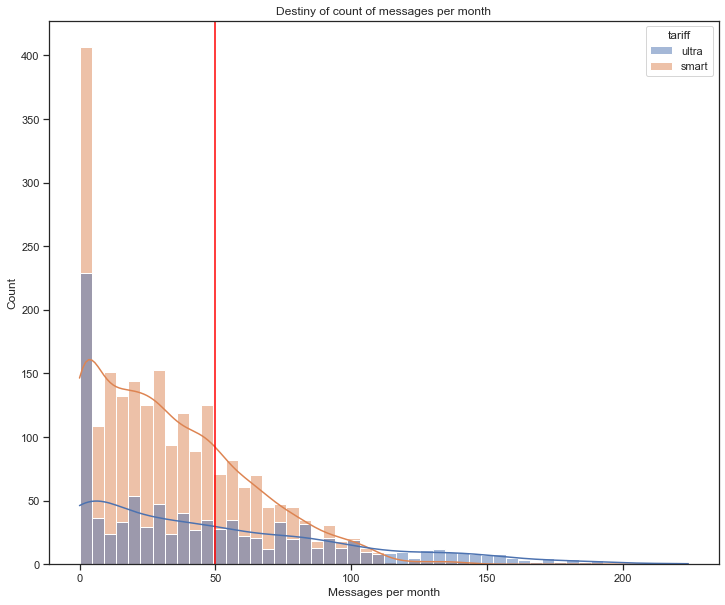

In [45]:
# How many messages are required per month on the smart and ultra plan
sns.set_theme(style="ticks")
plt.figure(figsize=(12,10))
sns.histplot(x=df.count_messages_month, hue=df.tariff, bins=50,common_norm=True,kde=True)
plt.xlabel('Messages per month')
plt.title('Destiny of count of messages per month')
plt.axvline(x=50, color='red')

print('Smart')
variance_messages_s = np.var(smart['count_messages_month'])
print('Var_m_s: {:.2f}'.format(variance_messages_s))
std_messages_s= np.sqrt(variance_messages_s)
print('Std_m_s: {:.2f}'.format(std_messages_s))
mean_messages_s = smart['count_messages_month'].mean()
print('Mean_m_s: {:.2f}'.format(mean_messages_s))
messages_s_max = mean_messages_s + 3*std_messages_s
print('Upper Forecast Limit m_s: {:.2f}'.format(messages_s_max))
print()
print('Ultra')
variance_messages_u = np.var(ultra['count_messages_month'])
print('Var_m_u: {:.2f}'.format(variance_messages_u))
std_messages_u= np.sqrt(variance_messages_u)
print('Std_m_u: {:.2f}'.format( std_messages_u))
mean_messages_u = ultra['count_messages_month'].mean()
print('Mean_m_u: {:.2f}'.format( mean_messages_u))
messages_u_max = mean_messages_u + 3*std_messages_u
print('Upper Forecast Limit m_u: {:.2f}'.format(messages_u_max))

1.Smart:
    - Users send from 1 to ~140 messages
    - The most of clients still trying to meet the limit of 50 messages
    - Many peaks because the variable is continuous
    - Almost all values are in the range of up to 119 messages
2.Ultra:
    - Users send from 1 to ~220 messages
    - All users spend messages much less than the limit
    - Most often send 1 message
    - More than 160 messages are sent quite rarely

Smart
Var_m_s: 36203.07
Std_m_s: 190.27
Mean_m_s: 417.93
Upper Forecast Limit m_s: 988.75

Ultra
Var_m_u: 100771.22
Std_m_u: 317.44
Mean_m_u: 526.62
Upper Forecast Limit m_u: 1478.96


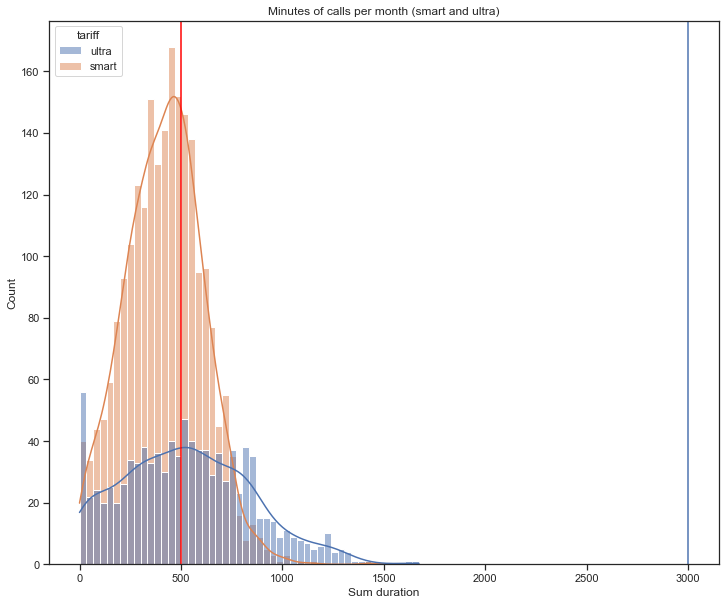

In [46]:
# How many minutes of calls are required per month smart and ultra
sns.set_theme(style="ticks")
plt.figure(figsize=(12,10))
sns.histplot(x=df.duration_calls_month, hue=df.tariff, bins=50,common_norm=True,kde=True)
plt.xlabel('Sum duration')
plt.title('Minutes of calls per month (smart and ultra)')
plt.axvline(x=500, color='red')
plt.axvline(x=3000, color='b')

print('Smart')
variance_messages_s = np.var(smart['duration_calls_month'])
print('Var_m_s: {:.2f}'.format(variance_messages_s))
std_messages_s= np.sqrt(variance_messages_s)
print('Std_m_s: {:.2f}'.format(std_messages_s))
mean_messages_s = smart['duration_calls_month'].mean()
print('Mean_m_s: {:.2f}'.format(mean_messages_s))
messages_s_max = mean_messages_s + 3*std_messages_s
print('Upper Forecast Limit m_s: {:.2f}'.format(messages_s_max))
print()
print('Ultra')
variance_messages_u = np.var(ultra['duration_calls_month'])
print('Var_m_u: {:.2f}'.format(variance_messages_u))
std_messages_u= np.sqrt(variance_messages_u)
print('Std_m_u: {:.2f}'.format( std_messages_u))
mean_messages_u = ultra['duration_calls_month'].mean()
print('Mean_m_u: {:.2f}'.format( mean_messages_u))
messages_u_max = mean_messages_u + 3*std_messages_u
print('Upper Forecast Limit m_u: {:.2f}'.format(messages_u_max))

1.Smart:
    - Range of values from 0 to 1355 minutes per month
    - Most of clients fit within the limit of 500 minutes
    - Users talking more than 750 minutes per month are becoming rarer
    - Almost all values are in the range up to 933
2.Ultra:
    - Range of values from 0 to 1579 minutes per month
    - Everyone fits into the limit of 3000 minutes, most do not use even a third of the minutes
    - Very rarely users use more than 1250 minutes
    - More than 1600 minutes are not be spent by any user

Smart
Var_m_s: 34530412.74
Std_m_s: 5876.26
Mean_m_s: 16229.19
Upper Forecast Limit m_s: 33857.96

Ultra
Var_m_u: 101832133.11
Std_m_u: 10091.19
Mean_m_u: 19486.90
Upper Forecast Limit m_u: 49760.47


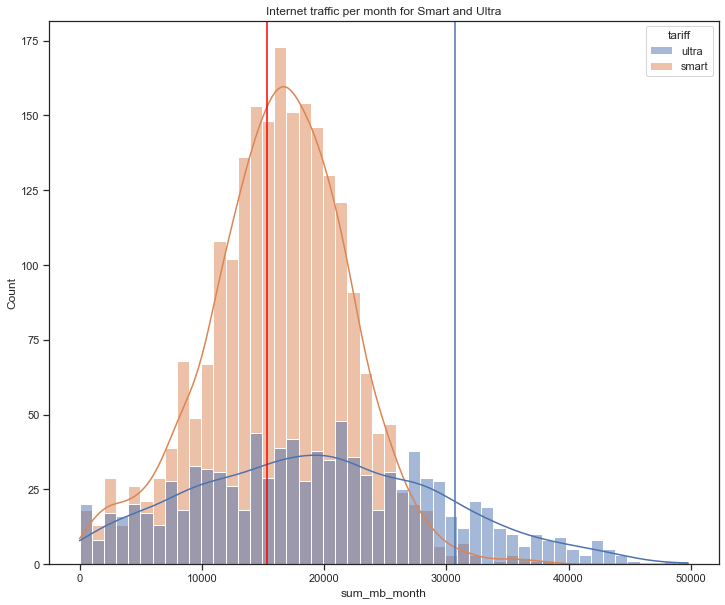

In [47]:
# Internet traffic per month for Smart and Ultra tariffs
sns.set_theme(style="ticks")
plt.figure(figsize=(12,10))
sns.histplot(x=df.sum_mb_month, hue=df.tariff, bins=50,common_norm=True,kde=True)
plt.title('Internet traffic per month for Smart and Ultra')
plt.axvline(x=15360, color='red')
plt.axvline(x=30720, color='b')

print('Smart')
variance_messages_s = np.var(smart['sum_mb_month'])
print('Var_m_s: {:.2f}'.format(variance_messages_s))
std_messages_s= np.sqrt(variance_messages_s)
print('Std_m_s: {:.2f}'.format(std_messages_s))
mean_messages_s = smart['sum_mb_month'].mean()
print('Mean_m_s: {:.2f}'.format(mean_messages_s))
messages_s_max = mean_messages_s + 3*std_messages_s
print('Upper Forecast Limit m_s: {:.2f}'.format(messages_s_max))
print()
print('Ultra')
variance_messages_u = np.var(ultra['sum_mb_month'])
print('Var_m_u: {:.2f}'.format(variance_messages_u))
std_messages_u= np.sqrt(variance_messages_u)
print('Std_m_u: {:.2f}'.format( std_messages_u))
mean_messages_u = ultra['sum_mb_month'].mean()
print('Mean_m_u: {:.2f}'.format( mean_messages_u))
messages_u_max = mean_messages_u + 3*std_messages_u
print('Upper Forecast Limit m_u: {:.2f}'.format(messages_u_max))

1. Smart:
    - Range of values from 0 to 38553 MB per month
    - The histogram shows that Internet traffic is overused more often than other tariff services
    - 99% of the values are in the range up to 33815
2. Ultra:
    - Range of values from 0 to 49746 MB per month
    - The histogram shows that Internet traffic is the only indicator of this tariff where users have overspending
    - The majority of users use up to 49605 MB of traffic, and most of them still try to meet the 30000 limit

# Hypothesis testing

In [48]:
# Select only the columns we need

data_payment = df.loc[:,['user_id','month','payment','tariff','city']]
mean_payment = data_payment.pivot_table(index=['user_id'], values='payment',columns='tariff', aggfunc='mean').reset_index()
mean_payment.columns = ['user_id','smart','ultra']
mean_payment_smart_all = mean_payment.loc[:,['user_id','smart']]
mean_payment_smart=mean_payment_smart_all.dropna()
display(mean_payment_smart.head(), mean_payment_smart.shape)
mean_payment_ultra_all = mean_payment.loc[:,['user_id','ultra']]
mean_payment_ultra=mean_payment_ultra_all.dropna()
display(mean_payment_ultra.head(), mean_payment_ultra.shape)

,user_id,smart
1,1001,950.000000
2,1002,1035.714286
5,1005,827.000000
6,1006,931.818182
7,1007,935.666667


(350, 2)

,user_id,ultra
0,1000,1950.0
3,1003,1950.0
4,1004,1950.0
13,1013,1950.0
16,1016,1950.0


(148, 2)

- H0: The average revenue of users of Smart and Ultra tariffs is the same
- H1: The average revenue of users of the Smart tariff is less than the average revenue of the Ultra tariff

Дисперсия выборки смарт: 367217.09
Дисперсия выборки ультра: 89897.64
p-value:  1.5026228308148506e-58

Reject H0

Revenue for the year smart: 465404.27
Revenue for the year ultra: 308937.78


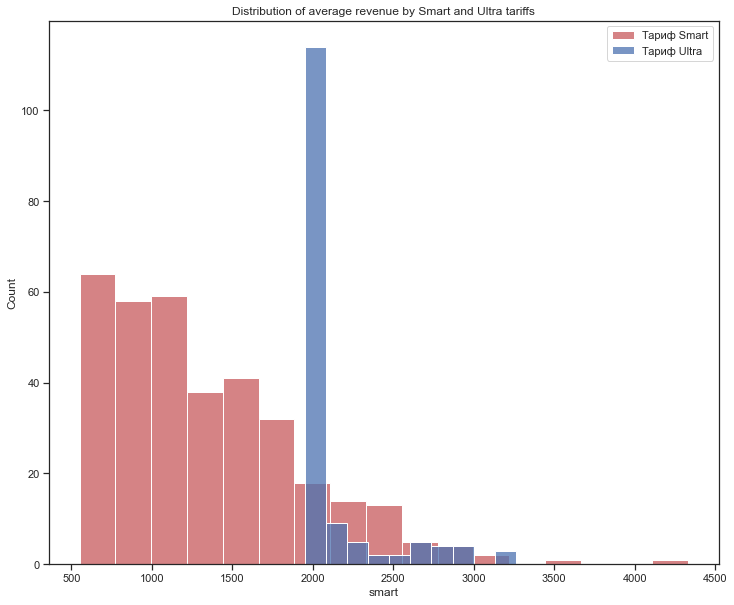

In [49]:
sns.set_theme(style="ticks")
plt.figure(figsize=(12,10))
sns.histplot(x=mean_payment_smart['smart'], color='r', alpha=0.7)
sns.histplot(x=mean_payment_ultra['ultra'], color='b', bins=10)

plt.legend(['Тариф Smart','Тариф Ultra'])
plt.title('Distribution of average revenue by Smart and Ultra tariffs')

# calculate the variances of two samples
var_payment_s = np.var(mean_payment_smart['smart'])
print('Дисперсия выборки смарт: {:.2f}'.format(var_payment_s))
var_payment_u = np.var(mean_payment_ultra['ultra'])
print('Дисперсия выборки ультра: {:.2f}'.format(var_payment_u))

from scipy import stats as st
array_1 = mean_payment_smart['smart'].values
array_2 = mean_payment_ultra['ultra'].values
sample_1 = array_1
sample_2 = array_2
results = st.ttest_ind(
    sample_1,
    sample_2, equal_var=False) # sample variances differ by more than 5%
print('p-value: ', results.pvalue)
print()
alpha = .001
if (results.pvalue/2 < alpha) and(sample_1.mean(),sample_2.mean()):
    print("Reject H0")
else:
    print("Can't reject H0")
smart_sum=sum(array_1)
print()
print('Revenue for the year smart: {:.2f}'.format(smart_sum))
ultra_sum=sum(array_2)
print('Revenue for the year ultra: {:.2f}'.format(ultra_sum))

### Conclusions:
1. We reject H0 that the average revenues of the two tariffs are equal and accept the alternative hypothesis that the average revenue of the Smart tariff is less than the average revenue of the Ultra tariff
2. The threshold value was chosen based on the size of the sample
3. Student's t-test was used

- H0: The average revenue of users from Moscow and the revenue of residents of other regions are the same
- H1: The average revenue of users from Moscow differs from the revenue of users from other regions

In [50]:
data_moscow = data_payment.query('city=="Москва"')
data_moscow = data_moscow.pivot_table(index=['user_id','tariff'], values='payment', aggfunc='mean').reset_index()
display(data_moscow.head(), data_moscow.shape)

data_no_moscow = data_payment.query('city!="Москва"')
data_no_moscow = data_no_moscow.pivot_table(index=['user_id','tariff'], values='payment', aggfunc='mean').reset_index()
display(data_no_moscow.head(), data_no_moscow.shape)

,user_id,tariff,payment
0,1001,smart,950.000000
1,1003,ultra,1950.000000
2,1007,smart,935.666667
3,1031,smart,890.500000
4,1033,smart,1914.000000


(99, 3)

,user_id,tariff,payment
0,1000,ultra,1950.000000
1,1002,smart,1035.714286
2,1004,ultra,1950.000000
3,1005,smart,827.000000
4,1006,smart,931.818182


(399, 3)

Variances of the sample of users from Moscow: 361154.72
Variances of the sample of users from other cities: 414714.17
p-value:  0.3564524858933712

Can't reject H0


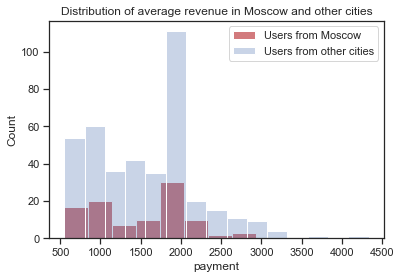

In [51]:

sns.histplot(x=data_moscow['payment'], color='r')
sns.histplot(x=data_no_moscow['payment'], color='b', alpha=0.3)
plt.legend(['Users from Moscow','Users from other cities'])
plt.title('Distribution of average revenue in Moscow and other cities')

# calculate the variances of the two samples
var_payment_mosc = np.var(data_moscow['payment'])
print('Variances of the sample of users from Moscow: {:.2f}'.format(var_payment_mosc))
var_payment_no_mosc = np.var(data_no_moscow['payment'])
print('Variances of the sample of users from other cities: {:.2f}'.format(var_payment_no_mosc))

from scipy import stats as st
array_1 = data_moscow['payment'].values
array_2 = data_no_moscow['payment'].values
sample_1 = array_1
sample_2 = array_2
results = st.ttest_ind(
    sample_1,
    sample_2, equal_var=False) # dispersion difference is more than 5%
print('p-value: ', results.pvalue)
print()
alpha = .001
if (results.pvalue < alpha):
    print("Reject H0")
else:
    print("Can't reject H0")

### Conclusions:
*Users in Moscow 99, in other cities 401*
1. It was not possible to reject H0 that the average revenue from users in Moscow differs from the average revenue in other cities
2. Student's t test was used
3. The distribution of the two samples is similar

# General conclusion:
1. Users of tariffs with a lower subscription fee and lower service limits go beyond the limit more often
2. In the case of a higher monthly fee and high limits, users overspent only Internet traffic
3. The Internet is the most demanded service among all users
    - its overspending is the most profitable part
    - *it would be interesting to see the profitability of tariffs with anlim*
4. Messages have lost their popularity and this service is used less than others, in two tariffs users barely send more than 100 messages, no one sent more than 224 messages
    - it may be worth lowering the limit on sending messages for users of the ultra tariff
5. The spread in the duration of calls for the two tariffs is very similar, rarely when the user use more than 750 minutes per month
    - it is difficult for the user to calculate how much he intends to talk for the future
    - users of the ultra tariff do not use the limit by minutes
    - *often a tariff with a large number of minutes is chosen by people who communicate a lot at work and do not want to watch the limit suddenly end*
    - by the way, there is another factor that connects 2 services (calls and the Internet): now many users call up in instant messengers
6. Because we adopted an alternative hypothesis in the case of the average values ​​of the two tariffs, we can say that the average revenue of the Smart tariff is lower than the average revenue of the Ultra tariff
7. Based on the above, we can say that the ultra tariff brings more money:
    - by the way, people who choose a large monthly fee and more included services will less often monitor how much they talk and consume traffic, they will be interested only if they have to pay an amount greater than the monthly fee, and then they will already ask what they lacked.
8. The amount that the smart tariff brought is larger, but there are more users on the smart tariff, but if every smart sheep switched to ultra, income would increase significantly, so it’s better to promote ultra (by advertising or create a more expensive tariff, people will intuitively go to ultra as an average price option )
6. We could not disprove the null hypothesis that the average revenue from users from Moscow is equal to the average revenue from users from other cities.